<a href="https://colab.research.google.com/github/alex-bolshunov/Plant-Disease-Detection/blob/main/plant_disease_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [99]:
#constants
N_ROWS = 3
RANDOM_STATE = 42
TEST_SIZE = 0.25
IMG = "image_path"
LBL = "label"

In [100]:
!curl "https://raw.githubusercontent.com/alex-bolshunov/Plant-Disease-Detection/refs/heads/main/data/plants.csv" -o plants.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12.5M  100 12.5M    0     0  14.3M      0 --:--:-- --:--:-- --:--:-- 14.3M


In [101]:
df = pd.read_csv("plants.csv")

In [102]:
df.head(N_ROWS)

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,label
0,0.822657,1.772103,0.551618,0.825739,1.237338,0.610392,0.107138,0.012374,1.682841,0.008460,...,0.171460,0.104246,5.655696,1.885628,0.124191,1.158248,0.432221,0.005591,1.977743,Pepper__bell___Bacterial_spot
1,0.652631,0.144246,0.118700,0.911722,0.292335,1.430772,0.218819,0.652375,2.447339,0.194902,...,0.855916,1.533810,2.646348,0.228621,0.233222,1.675443,0.215615,0.221080,2.943224,Pepper__bell___Bacterial_spot
2,1.429725,0.812403,0.220558,0.241219,1.728315,1.274676,0.284197,0.598039,0.612824,0.291447,...,0.093914,0.426252,1.124067,0.477904,0.083384,0.762229,0.412596,0.115656,1.427429,Pepper__bell___Bacterial_spot


In [103]:
#encode lables
encoder = LabelEncoder()

df.loc[:, LBL] = encoder.fit_transform(df.loc[:, LBL])

In [104]:
robust = RobustScaler()

X, y = robust.fit_transform(df.drop(LBL, axis = 1)), df.loc[:, LBL].to_numpy().astype("int")

In [105]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [106]:
#define and train a model
svm = SVC(kernel = "rbf")

svm.fit(X_train, y_train)

SVC()

In [107]:
#predict class
y_pred = svm.predict(X_test)

In [108]:
p = 5

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy, standard scaler, default parameters: {round(accuracy, p)}")
print(f"Precision, standard scaler, default parameters: {round(precision, p)}")
print(f"Recall, standard scaler, default parameters: {round(recall, p)}")
print(f"F1-score, standard scaler, default parameters: {round(f1, p)}")

Accuracy, standard scaler, default parameters: 0.99031
Precision, standard scaler, default parameters: 0.98953
Recall, standard scaler, default parameters: 0.99474
F1-score, standard scaler, default parameters: 0.9903


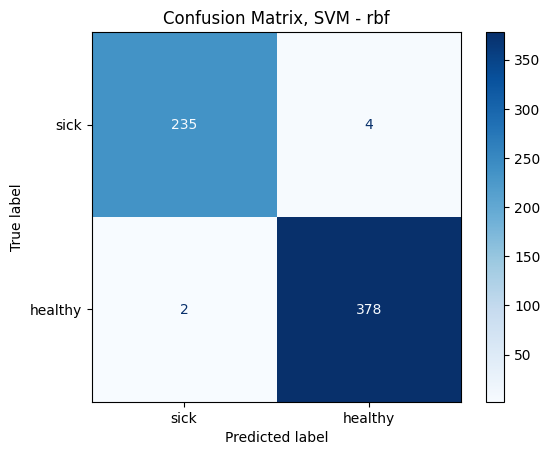

In [109]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=["sick", "healthy"])

cm_display.plot(cmap="Blues")
plt.title("Confusion Matrix, SVM - rbf")
plt.show();